In [1]:
import pandas as pd
import numpy as np 
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime

### Importing the Stock Prices

In [2]:
AAPL=pd.read_csv('individual_stocks_5yr/AAPL_data.csv')
GOOG=pd.read_csv('individual_stocks_5yr/GOOG_data.csv')
MSFT=pd.read_csv('individual_stocks_5yr/MSFT_data.csv')
AMZN=pd.read_csv('individual_stocks_5yr/AMZN_data.csv')

### Historical Closing Price of Apple Stock

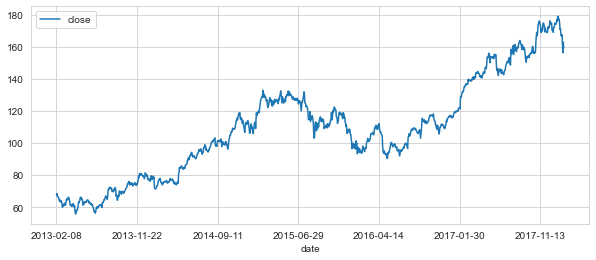

In [3]:
AAPL.plot(x='date', y='close',legend=True,figsize=(10,4))
plt.ioff()

### Volume traded for Apple Stock

In [4]:
title='VOLUME TRADED'
ylabel='Volume'
xlabel='Time'

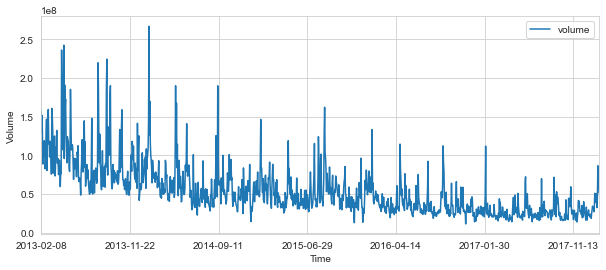

In [5]:
ax=AAPL.plot(x='date', y='volume',legend=True,figsize=(10,4));
ax.autoscale(axis='x',tight=True)  # use both if want to scale both axis
ax.set(xlabel=xlabel,ylabel=ylabel)
plt.ioff()

### Plotting Stock Price Between Specified Time

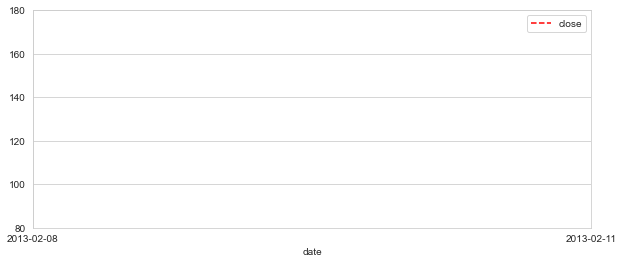

In [12]:
AAPL.plot(x='date', y='close',xlim=['2016-01-01','2017-12-31'],ylim=[80,180],legend=True,figsize=(10,4),ls='--',c='red')
plt.ioff()

### Moving Average for Apple Stock

In [13]:
AAPL['close_10']=AAPL['close'].rolling(10).mean()
AAPL['close_50']=AAPL['close'].rolling(50).mean()

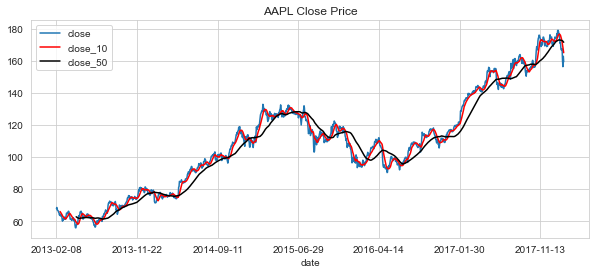

In [14]:
ax=AAPL.plot(x='date',y='close',title='AAPL Close Price',figsize=(10,4))
AAPL.plot(x='date',y='close_10',color='red',ax=ax)
AAPL.plot(x='date',y='close_50',color='k',ax=ax)
plt.ioff()

**Daily Returns**

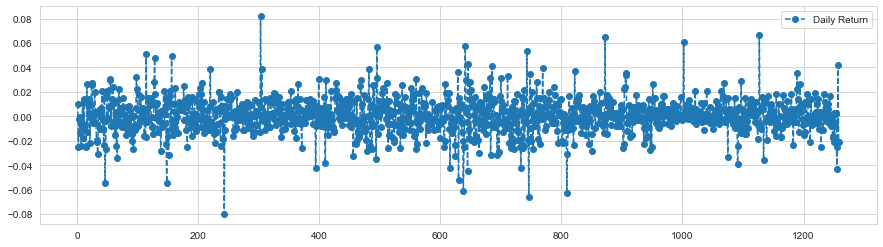

In [9]:
AAPL['Daily Return']=AAPL['close'].pct_change()
AAPL['Daily Return'].plot(figsize=(15,4),legend=True,linestyle='--',marker='o')
plt.ioff()

**Average Daily return**

/Users/aishwaryamelige/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


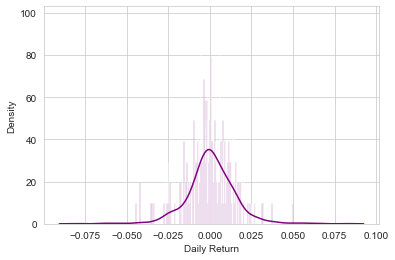

In [10]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=2000,color='purple')
plt.ioff()

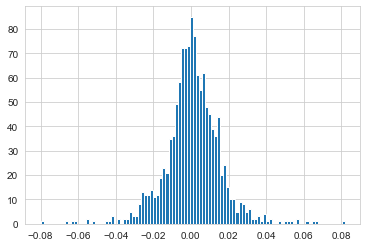

In [11]:
AAPL['Daily Return'].hist(bins=100)
plt.ioff()

### Checking if the Stock Prices of Tech Companies are Correlated

In [12]:
df=AAPL['date'].copy()
df=pd.DataFrame(df)
df['AAPL']=AAPL['close']
df['GOOG']=GOOG['close']
df['MSFT']=MSFT['close']
df['AMZN']=AMZN['close']
df.drop(['date'], axis = 1, inplace = True, errors = 'ignore')

In [13]:
tech_rets=df.pct_change()
tech_rets=pd.DataFrame(tech_rets)
tech_rets['date']=AAPL['date']
tech_rets.shape

(1259, 5)

**Pair Plot**

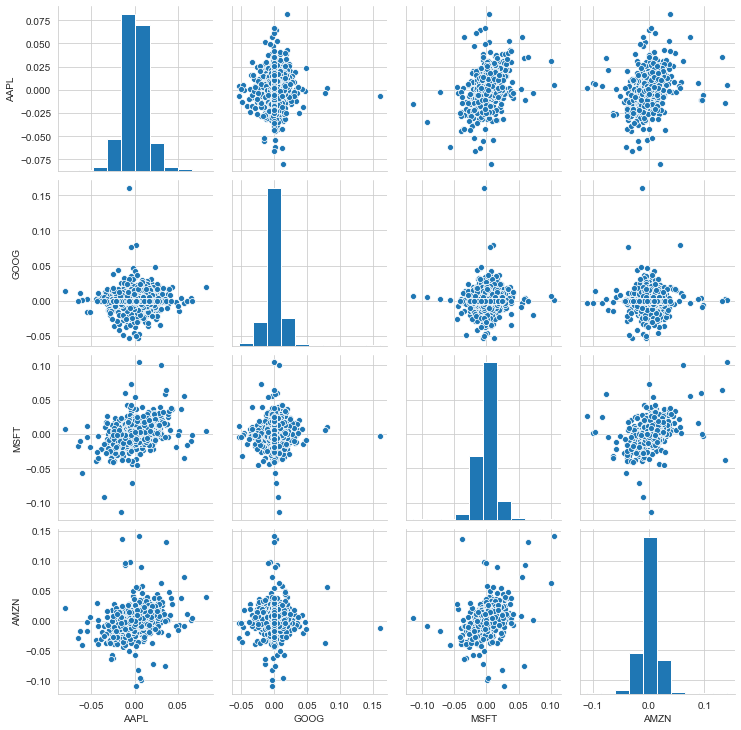

In [14]:
sns.pairplot(tech_rets.dropna())
plt.ioff()